# Fonctionnement de l'ascenseur spatial

Nous allons d'abord charger les librairies Python de Mathematiques (numpy) et de représentation graphique (matplotlib).   
Sans numpy nous n'aurions pas de fonction racine (sqrt).   
Quant à matplotlib, il s'agit d'une librairie qui fonctionne un peu comme la calculatrice du Lyçée et nous permet de tracer des courbes.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Définissons ensuite les constantes utilisées:

In [3]:
G  = 6.67408E-11    # Constante de gravitation universelle en m(3)*s(-2)*kg(-1)
M  = 5.97242E24     # Masse de la terre en kg
#Rt = 6.3781E6       # Rayon de la Terre en m, soit 6378 km  
Rt = 6378           # Rayon  de la terre en km

# 1. Movement orbital

Nous devons calculer la vitesse de rotation de la terre et la hauteur de l'orbite géostationnaire.
Nous en profittereons aussi pour calculer l'accélération et les vitesses orbitales et linéaires à différentes orbites.
Calcul de la vitesse de rotation de la terre, en radians par seconde:

### 1.1. Calcul de la vitesse de rotation de la terre
Wt en radians par seconde:

In [4]:
Wt = (2*np.pi)/(24*60*60)
print("Vitesse de rotation de la terre = ",Wt,"Radians/seconde")

Vitesse de rotation de la terre =  7.27220521664304e-05 Radians/seconde


### 1.2 Fonctions accélération
Nous allons définir des fonctions pour la 

In [5]:
def AccGravitationnelle (r_km):
    AccGravitationnelle = (G*M)/(r_km**2) * 1E-6
    return AccGravitationnelle

def AccCentrifuge (r_km):
    AccCentrifuge = r_km * Wt**2 * 1E3
    return AccCentrifuge

def AccTotale (r_km):
    AccTotale = AccGravitationnelle(r_km) - AccCentrifuge(r_km)
    return AccTotale

**Exemple:** Calcul de l'accélération gravitationnelle à la surface de la terre:

In [6]:
print("Accélération gravitationnelle à la surface de la terre:",AccGravitationnelle(Rt), "(m.s-2)")
print("Accélération gravitationnelle à la surface de la terre:",round(AccGravitationnelle(Rt),2), "(m.s-2)")

Accélération gravitationnelle à la surface de la terre: 9.79879607159331 (m.s-2)
Accélération gravitationnelle à la surface de la terre: 9.8 (m.s-2)


**Exemple:** Calcul de l'accélération centrifuge à la surface de la terre:

In [7]:
print("Accélération centrifuge à la surface de la terre:",round(AccCentrifuge(Rt),9), "(m.s-2)")

Accélération centrifuge à la surface de la terre: 0.033730033 (m.s-2)


Conclusion: 

### 1.3 Calcul de la hauteur de l'orbite geostationnaire
Nous pouvons calculer la valeur exacte de l'orbite geostationnaire. Cette valeur doit 

In [8]:
Rg = ((G*M)/(Wt**2))**(1/3) * 1E-3
Hg = Rg - Rt

print("Rayon de l'orbite geostationnaire en metres:",int(Rg))
print("Hauteur de l'orbite geostationnaire en metres:",int(Hg))

Rg = ((G*M)/(Wt**2))**(1/3) * 1E-3
Hg = Hg * 1E-3

print("Rayon de l'orbite geostationnaire en km:",int(Rg))
print("Hauteur de l'orbite geostationnaire en km:",int(Hg))


Rayon de l'orbite geostationnaire en metres: 42241
Hauteur de l'orbite geostationnaire en metres: 35863
Rayon de l'orbite geostationnaire en km: 42241
Hauteur de l'orbite geostationnaire en km: 35


#### Représentation graphique:
Nous allons tracer les courbes des deux accélérations, gravitationelle et centrifuge.
Elles devraient se croiser dans un point d'abcisse r = 42241 km.
Le rayon r prendra des valeurs entre 6.000 km et 160.000 km

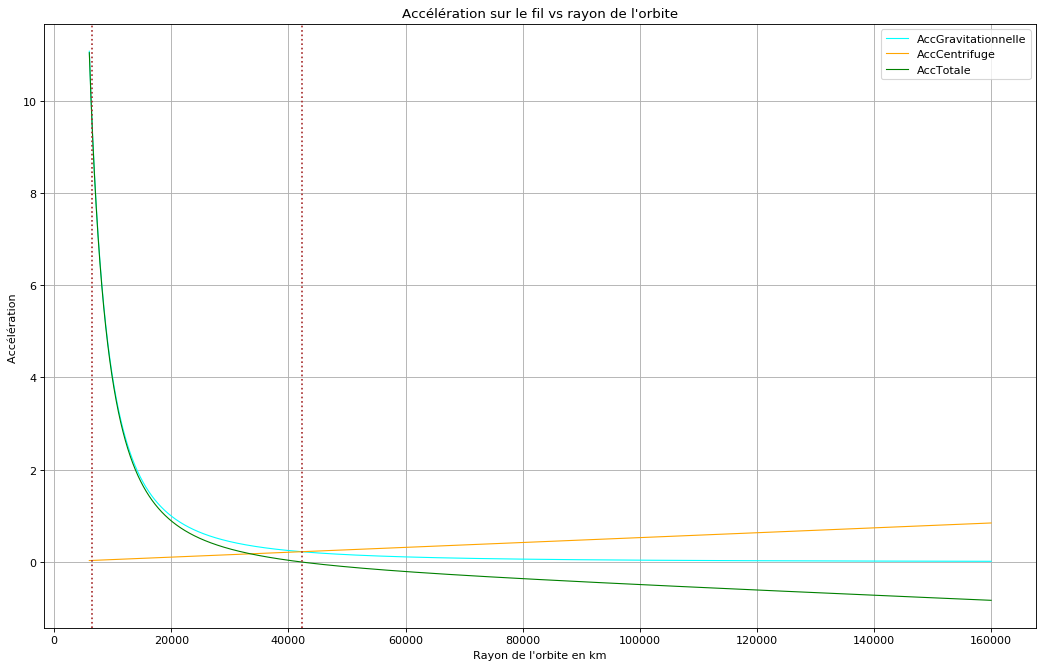

In [106]:
r_km = np.arange(6000, 160000, 1)

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(r_km,  AccGravitationnelle(r_km), color="cyan",   linewidth=1, label='AccGravitationnelle')
plt.plot(r_km,  AccCentrifuge(r_km),       color="orange", linewidth=1, label='AccCentrifuge' )
plt.plot(r_km,  AccTotale(r_km),           color="green",  linewidth=1, label='AccTotale' )

plt.axvline(x=Rt, linestyle=":", color="brown")
plt.axvline(x=Rg, linestyle=":", color="brown")

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Accélération ")
plt.grid()
plt.title("Accélération sur le fil vs rayon de l'orbite")
plt.legend(loc='upper right')
plt.savefig('images/Accelerations.png')

plt.show()



Nous observons que la Force totale s'annule pour le rayon de l'orbite géostationnaire. Cette courbe verte nous montre la force par unité de longueur et par unité de masse exercée sur chaque point du cable. La force est négative (attractive) au desssous de l'orbite géostationnaire et elle est positive au dessus.


### 1.3 Autres calculs:
À toute orbite correspond une vitesse orbitale précise pour laquelle les forces d'attraction gravitationelle et centrifuge se compensent.

In [120]:
def VitesseAngulaire(r_km):
    VitesseAngulaire = np.sqrt((G*M)/(r_km**3))
    return VitesseAngulaire

print(VitesseAngulaire(Rt), Rt*Wt)


39.1962123868 0.4638212487174931


# 2. Le cable
Nous voulons comprendre pourquoi le cable est capable de se maintenir verticalement sans exercer de force sur la surface terrestre. 
Intuitivement, il semble que le cable sera en équilibre lorsque les deux parties exerceront la même force, le même poids,   
Nous allons introduire une autre fonction que nous appelerons Tension_cable

In [101]:
def IntegraleAcc (r_km):
    IntegraleAcc = G*M*( -1/r_km - (r_km**2)/(2*Rg**3) + 1/Rt + (Rt**2)/(2*Rg**3))
    return IntegraleAcc

# Rf: rayon final du cable, tension nulle, valeur extraite du graphique suivant
Rf = 154400

Nombre de maillons: 6    Longueur d'un maillon: 5977.0 km


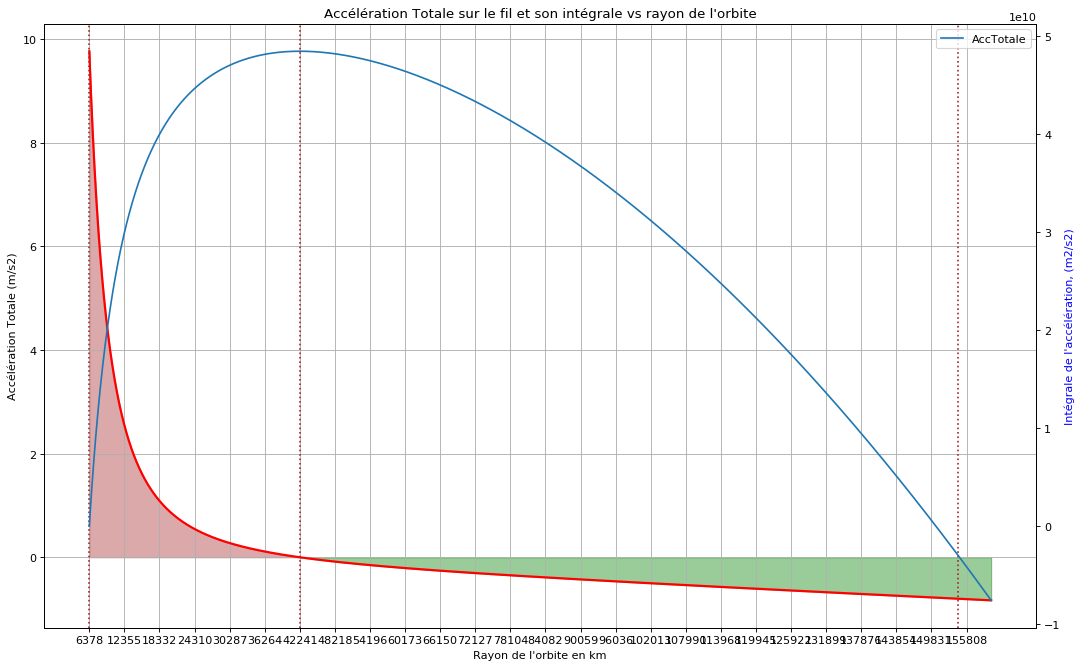

In [114]:
plt.close('all')

NombreMaillons = 6
LongueurMaillon = (Rg-Rt)/NombreMaillons
print("Nombre de maillons:", NombreMaillons, "   Longueur d'un maillon:",round(LongueurMaillon,0), "km")

fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

ax1 = fig.add_subplot(111)

r_km = np.arange(Rt, 160000, 1)

ax1.plot(r_km,  AccTotale(r_km), color="red",  linewidth=2)

plt.fill_between(r_km, 0, AccTotale(r_km), r_km < Rg, color='brown', alpha=.4)
plt.fill_between(r_km, 0, AccTotale(r_km), r_km > Rg, color="green", alpha=.4)

plt.axvline(x=Rt, linestyle=":", color="brown")
plt.axvline(x=Rg, linestyle=":", color="brown")
plt.axvline(x=Rf, linestyle=":", color="brown")

#plt.xlim([Rt,Rf])
#plt.xlim(xmax=Rf)

plt.xticks(np.arange(Rt,160000,LongueurMaillon))
plt.grid()

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Accélération Totale (m/s2)")

ax2 = ax1.twinx()
ax2.plot(r_km, IntegraleAcc(r_km), label="Integrale de l'accélération")
ax2.set_ylabel("Intégrale de l'accélération, (m2/s2)", color='b')

plt.title("Accélération Totale sur le fil et son intégrale vs rayon de l'orbite")
plt.legend(['AccTotale', 'IntegraleAcc'])
plt.savefig('images/acctotale-integrale.png')

plt.show()

# 3. Quel matériaux por le cable? Calcul du poids du cable et de sa tension:
Nous arrivons ici 

Entre 6.378 km (Surface de la terre) et 42.241 km (Orbite géostationnaire), la tension du cable augmente progressivement, elle est maximale lorsque l'on atteint la station orbitale. Nous avons trouvé une formule qui donne cette tension, représentation graphique ci-dessous.   

### Valeurs de densité et de tension maximale por différents matériaux:

In [110]:
densite_acier  = 7900
densite_kevlar = 1440
densite_cnt    = 1300

Tmax_acier  = 5E9
Tmax_kevlar = 3.6E9
Tmax_cnt    = 139E9

### Calcul du poids du cable et de sa tension:
Entre 6.378 km (Surface de la terre) et 42.241 km (Orbite géostationnaire), la tension du cable augmente progressivement, elle est maximale lorsque l'on atteint la station orbitale. Nous avons trouvé une formule qui donne cette tension, représentation graphique ci-dessous.


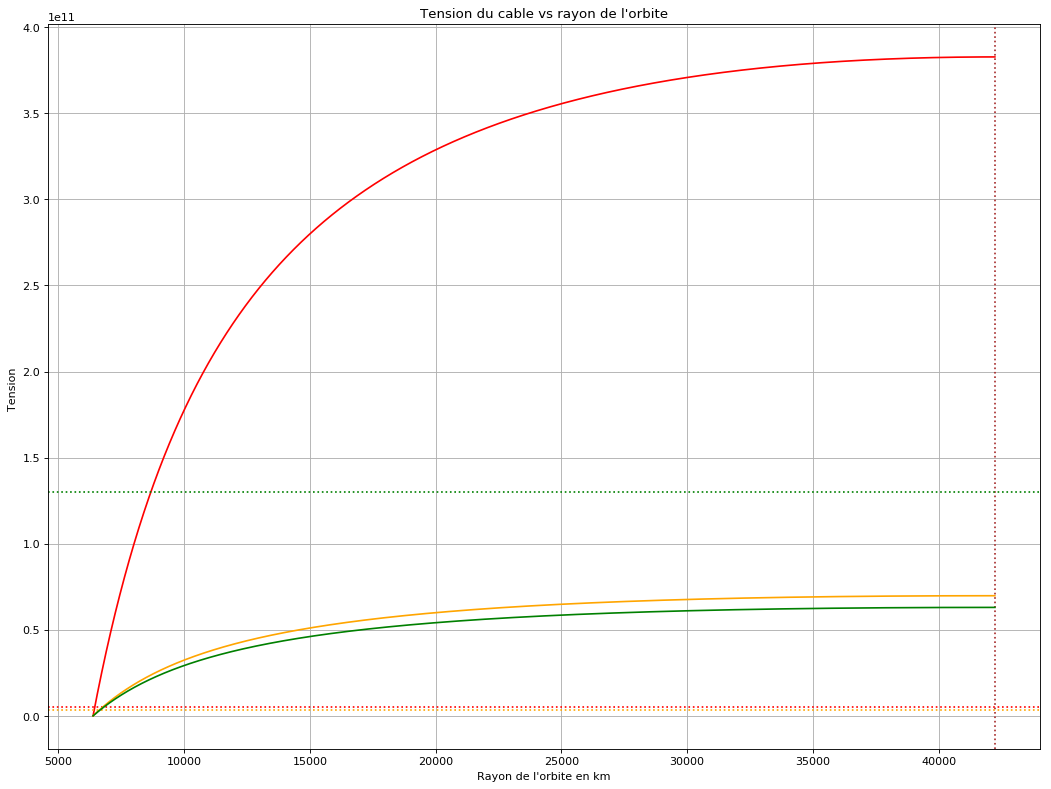

Acier: 382752803849.0653 Pascals
Kevlar: 69767599688.94354 Pascals
CNT: 62984638608.074036 Pascals


In [117]:
def Tension (r_km):
    Tension = G*M*1E-3*( -1/r_km - (r_km**2)/(2*Rg**3) + 1/Rt + (Rt**2)/(2*Rg**3))
    return Tension

r_km = np.arange(Rt, Rg, 1)

plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.axvline(x=Rg, linestyle=":", color="brown")

#Acier:
plt.plot(r_km, Tension(r_km)*densite_acier, color="red")
plt.axhline(y=5.0E9, linestyle=":", color="red")

#Kevlar:
plt.plot(r_km, Tension(r_km)*densite_kevlar, color="orange")
plt.axhline(y=3.6E9, linestyle=":", color="orange")

#Carbon nanotubes:
plt.plot(r_km, Tension(r_km)*densite_cnt, color="green")
plt.axhline(y=130.0E9, linestyle=":", color="green")

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Tension ")
plt.grid()
plt.title("Tension du cable vs rayon de l'orbite")
plt.savefig('images/materiaux.png')

plt.show()

print("Acier:",  Tension(Rg)*densite_acier,  "Pascals" )
print("Kevlar:", Tension(Rg)*densite_kevlar, "Pascals")
print("CNT:",    Tension(Rg)*densite_cnt,    "Pascals")

## Trucs pour calculer les intégrales

In [139]:
NombreMaillons = 16
LongueurMaillon = (Rg-Rt)/NombreMaillons

def AccTotaleMax(r_km):
    AcctotaleMax = AccTotale( (r_km/LongueurMaillon))
    return AccTotaleMax

In [140]:
r_km = np.arange(Rt, Rg, 1)

plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(r_km, AccTotale(r_km))
plt.plot(r_km, AccTotaleMax(r_km))

plt.axvline(x=Rt, linestyle=":", color="brown")
plt.axvline(x=Rg, linestyle=":", color="brown")

plt.xticks(np.arange(Rt,Rg,LongueurMaillon))
plt.grid()

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Accélération totale ")

plt.title("Accélération sur le cable vs rayon de l'orbite")

plt.show()

ValueError: x and y must have same first dimension, but have shapes (35864,) and (1,)

Nombre de maillons: 16    Longueur d'un maillon: 2241.0 km
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


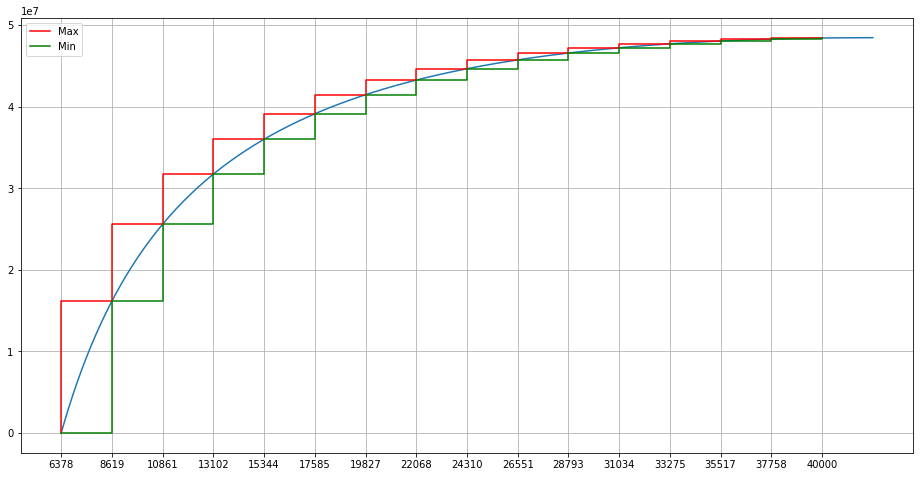

In [118]:
# import matplotlib.pyplot as toto

NombreMaillons = 16

LongueurMaillon = (Rg-Rt)/NombreMaillons
print("Nombre de maillons:", NombreMaillons, "   Longueur d'un maillon:",round(LongueurMaillon,0), "km")

# Maillons est la liste 
Maillons = [0]*NombreMaillons

print(Maillons)
Sigma_min, Sigma_max = 0, 0

for i in range (NombreMaillons):  
    imin = Tension (Rt + LongueurMaillon*i ) * LongueurMaillon
    imax = Tension (Rt + LongueurMaillon*(i+1) ) * LongueurMaillon
    Sigma_min = Sigma_min + imin
    Sigma_max = Sigma_max + imax
    #print ("Maillon:", i, "Min:", imin, "Max:", imax, "Sigma_min:", Sigma_min, "Sigma_max:", Sigma_max)
    
fig, ax = plt.subplots(figsize=(16, 8))

ax.set_xticks(np.arange(Rt, Rg, LongueurMaillon))

r_km = np.arange(Rt, Rg, 1 )

plt.plot(r_km, Tension(r_km))
#plt.fill_between(r_km, Tension(r_km), color='blue', alpha=.25)


r_km = np.arange(Rt, Rg, LongueurMaillon )

plt.step(r_km, Tension(r_km), where='pre',  label='Max', color="red")
plt.step(r_km, Tension(r_km), where='post', label='Min', color="green")

ax.grid(markevery=LongueurMaillon)

plt.legend()

plt.show()

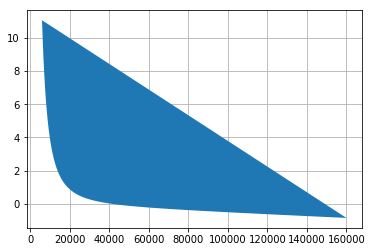

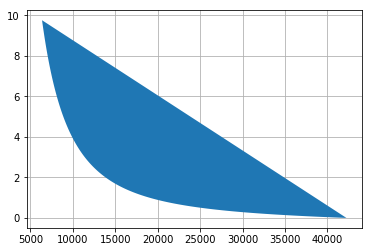

In [184]:
fig, ax = plt.subplots()

ax.fill(r_km, AccTotale(r_km), zorder=10)
ax.grid(True, zorder=5)

r_km = np.arange(Rt, Rg, 1 )
#r_km = np.linspace(0, 2 * np.pi, 500)
#y1 = np.sin(x)
#y2 = np.sin(3 * x)

plt.show()